Not enough data near  5.18900606925888  microns. Skipping.
Not enough data near  5.174782735717755  microns. Skipping.
Not enough data near  5.160712474562946  microns. Skipping.
Not enough data near  5.146793855211405  microns. Skipping.


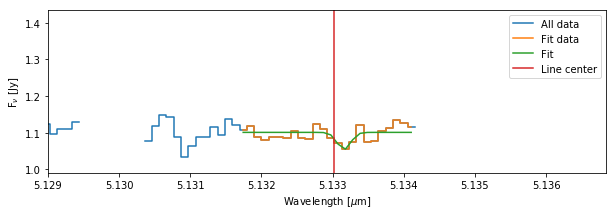

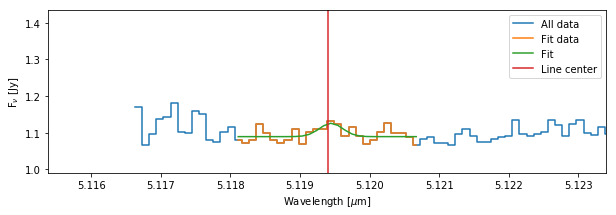

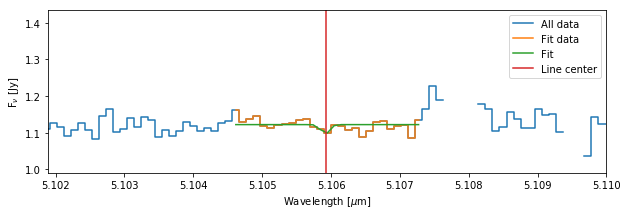

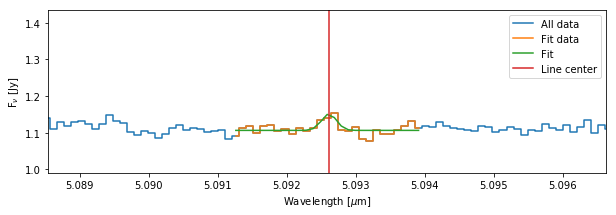

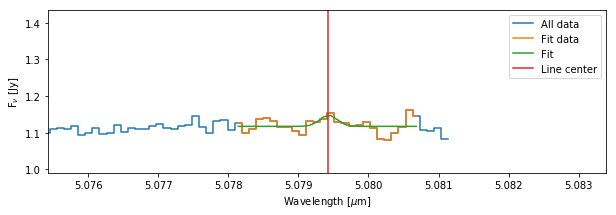

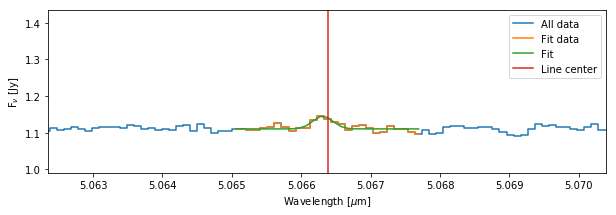

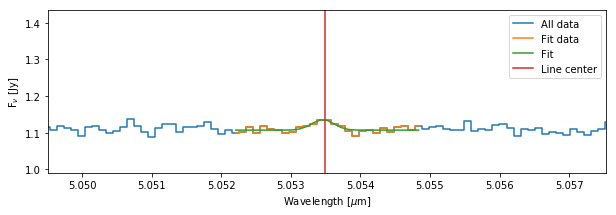

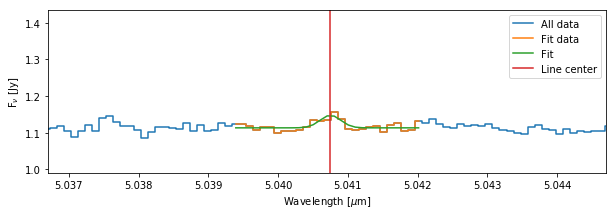

C:\Users\hanna\Anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


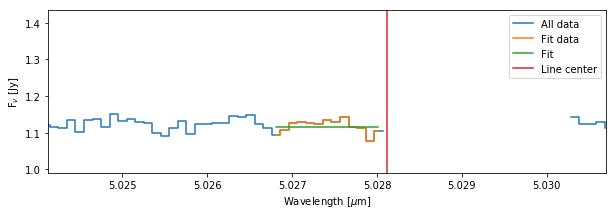

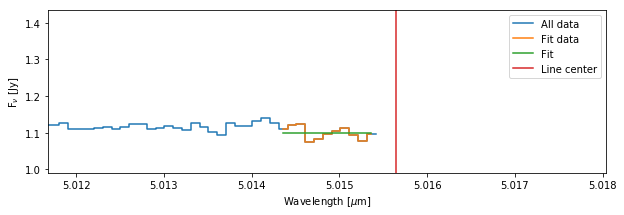

Not enough data near  5.003301606716407  microns. Skipping.


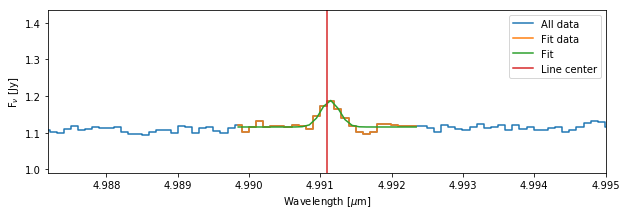

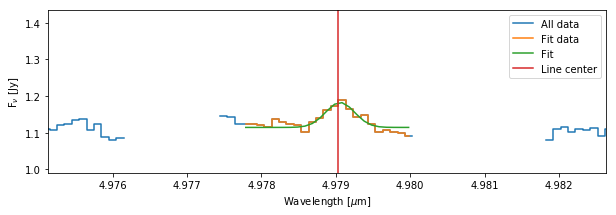

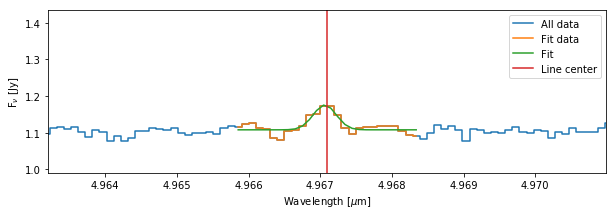

Not enough data near  4.955284086653252  microns. Skipping.
Not enough data near  4.94361005210669  microns. Skipping.
Not enough data near  4.93206620061765  microns. Skipping.
Not enough data near  4.9206515784641  microns. Skipping.
Not enough data near  4.90936475506299  microns. Skipping.
Not enough data near  4.898204776692286  microns. Skipping.
Not enough data near  4.887170689629956  microns. Skipping.
Not enough data near  4.87626106329295  microns. Skipping.
Not enough data near  4.865475420820251  microns. Skipping.
Not enough data near  4.854812808489826  microns. Skipping.
Not enough data near  4.844271795718625  microns. Skipping.
Not enough data near  4.833852382506649  microns. Skipping.


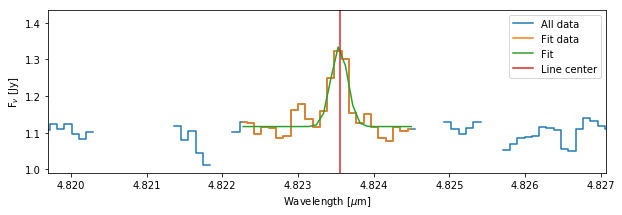

Not enough data near  4.8133716787061385  microns. Skipping.


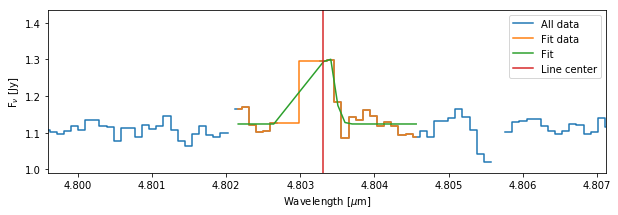

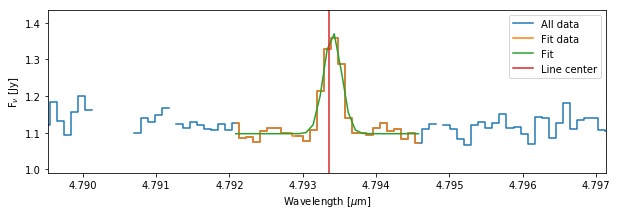

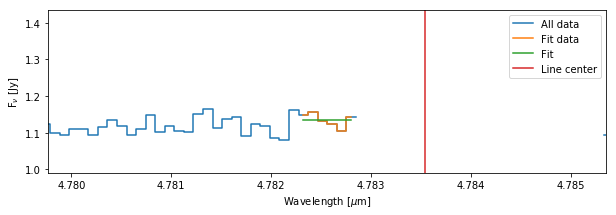

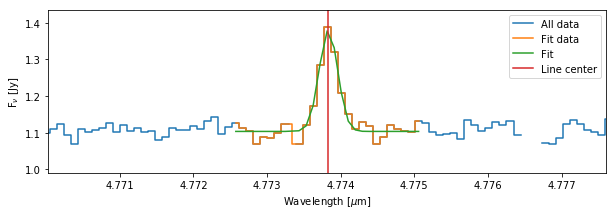

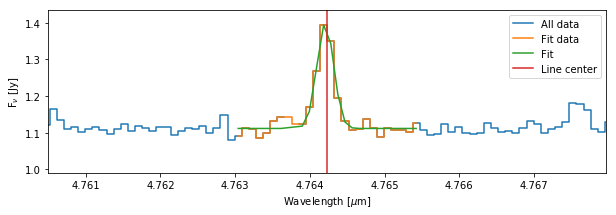

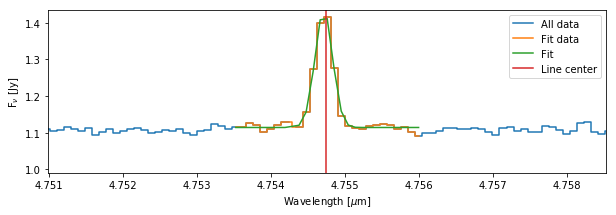

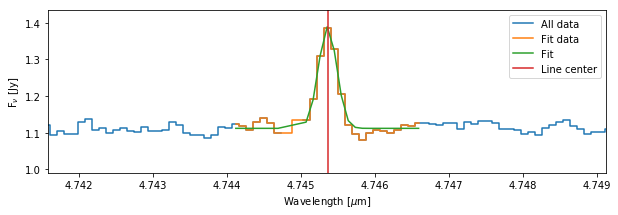

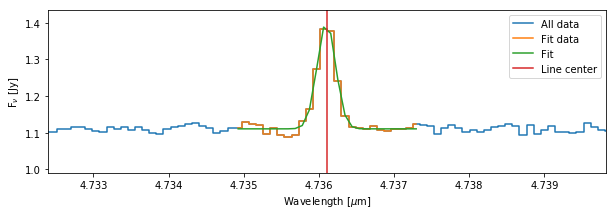

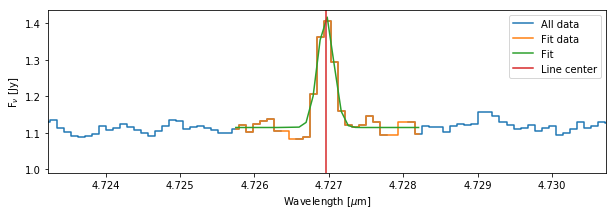

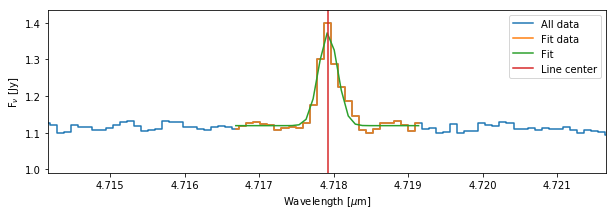

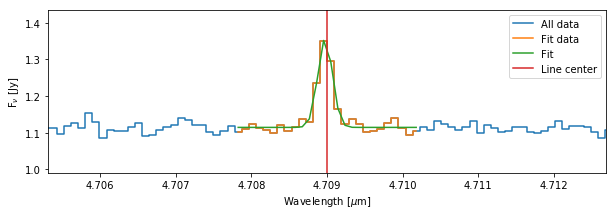

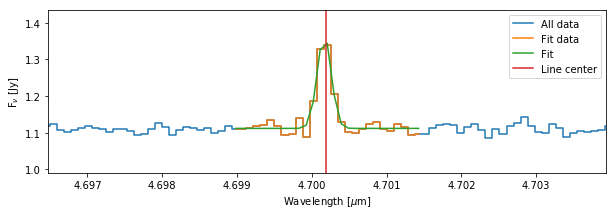

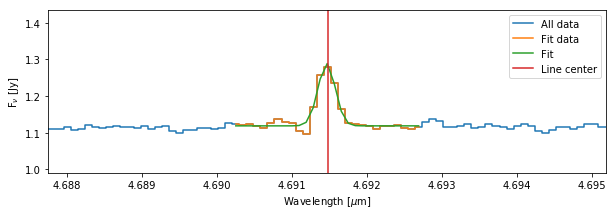

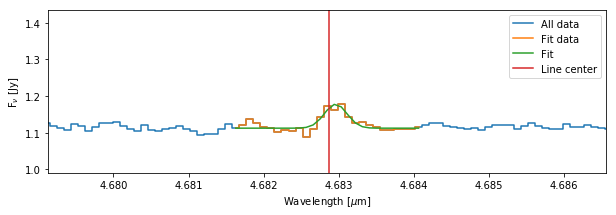

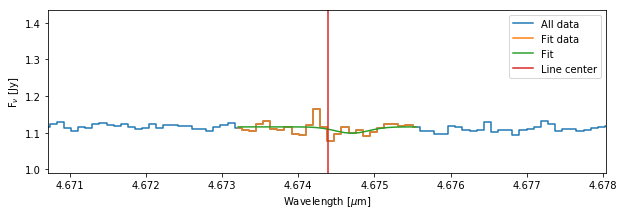

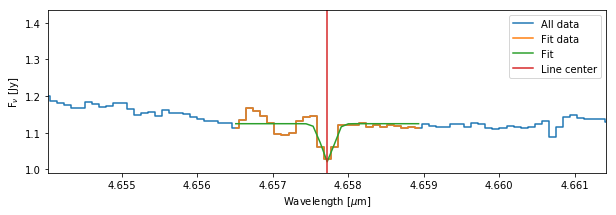

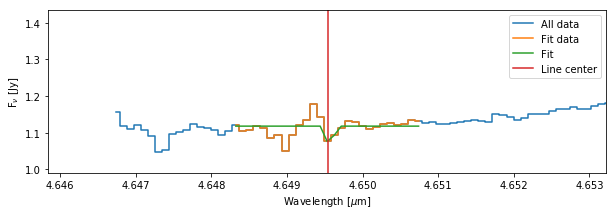

Not enough data near  4.641474250037329  microns. Skipping.
Not enough data near  4.633508286755587  microns. Skipping.
Not enough data near  4.625646279175457  microns. Skipping.
Not enough data near  4.617886796713888  microns. Skipping.
Not enough data near  4.610229362509864  microns. Skipping.
Not enough data near  4.602673976563386  microns. Skipping.


In [2]:
#flux calculator
import astropy
import pandas as pd
from astropy import units as u
from astroquery.hitran import Hitran
from flux_calculator import extract_hitran_data, calc_fluxes, extract_vup, make_rotation_diagram

#Read in HITRAN data
out_all=extract_hitran_data('CO',4.6,5.2)  #astropy table
lineflux_data=extract_vup(out_all,1)

#Read in spectral data
data=pd.read_csv('/Users/hanna/Desktop/URSI/summer_research/nirspec_lkha330_glue.dat', header=26,names=['wave','flux'],
                 skipinitialspace=True,sep=' ')
wave=data['wave']
flux=data['flux']

out=calc_fluxes(wave,flux,lineflux_data,fwhm_v=17., sep_v=80., cont=1.12,vet_fits=False, plot=True, v_dop=15.)

rot=make_rotation_diagram(out)


In [6]:
#spec_utils
from astropy.time import Time
from astropy.coordinates import SkyCoord
from spec_utils import vgeo

mydate=Time('2014-08-16T00:00:00.0', format='isot', scale='utc')
mycoord=SkyCoord('16h31m33.46s', '-24d27m37.3s', frame='icrs')

#Calculate the heliocentric velocity (Earth-induced + intrinsic)
myv=vgeo(mydate, mycoord, vhel=-7.93)

print(myv, ' km/s')

20.23922984567082  km/s
